In [74]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import rasterio
import os
from torchvision import transforms
import torch
import torch.nn.functional as F
from torchvision.utils import save_image
from rasterio import open as rstopen

In [65]:
def read_method(method:str=''):
    if method == 'Image' or method == '':
        return Image.open
    if method == 'rasterio':
        return rasterio.open
    if method == 'numpy':
        return np.load


def image_normalize(im, axis = (0,1), c = 1e-8):
    return (im - im.mean(axis)) / (im.std(axis) + c)

In [4]:
data_dir = "/home/winter/code-resource/treeseg/trainingdata"

pan: 0.0,899.0
ndvi: 0.0,0.8674033284187317
[0 1]
[0 1]


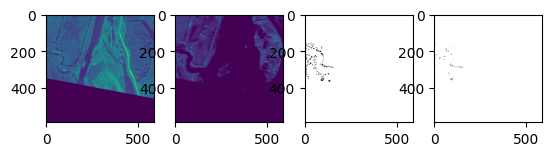

------------------norm2------------------
tensor(0.)
tensor(2.0667)
------------------norm3------------------
-1.2605478
4.4749236
------------------norm4------------------
tensor(-1.2605)
tensor(4.4749)


In [101]:
# check interm png
interm_png = 'interm_png'
v = 0
a = 63
pattern = '{}-{}-area{}.png'
pan = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('pan',v,a)}").read(1)
ndvi = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('ndvi',v,a)}").read(1)
anno = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('annotation',v,a)}").read(1)
boundary = read_method('rasterio')(f"{data_dir}/{interm_png}/{pattern.format('boundary',v,a)}").read(1)

print(f'pan: {np.min(pan)},{np.max(pan)}')
print(f'ndvi: {np.min(ndvi)},{np.max(ndvi)}')
print(np.unique(anno))
print(np.unique(boundary))

fig = plt.figure()
fig.add_subplot(1,4,1)
plt.imshow(pan)
fig.add_subplot(1,4,2)
plt.imshow(ndvi)
fig.add_subplot(1,4,3)
plt.imshow(anno,cmap='binary')
fig.add_subplot(1,4,4)
plt.imshow(boundary,cmap='binary')
plt.show()

# fig2 = plt.figure()
# max_v = np.max(pan)
# plt.imshow(pan+anno*max_v)
# plt.show()

# fig3 = plt.figure()
# plt.imshow(pan)
# plt.show()

# fig4 = plt.figure()
# plt.imshow(ndvi)
# plt.show()

panT = torch.as_tensor(pan,dtype=torch.float32).unsqueeze(0)
norm2 = F.normalize(panT, 0, 1)
print('------------------norm2------------------')
print(torch.min(norm2))
print(torch.max(norm2))
# print(norm2)

norm3 = image_normalize(pan)
print('------------------norm3------------------')
print(np.min(norm3))
print(np.max(norm3))
# print(norm3)

std,mean = torch.std_mean(panT)
trans = transforms.Normalize(mean,std)
norm4 = trans(panT)
print('------------------norm4------------------')
print(torch.min(norm4))
print(torch.max(norm4))

In [ ]:
# all-view min-max & normalize
full_pan = rstopen(f'{data_dir}/tif/pan-0.tif').read(1)

In [88]:
partial_pan = full_pan[20000:22000,20000:22000]

min max: 56,1012
zeros: 0.6076373420993251


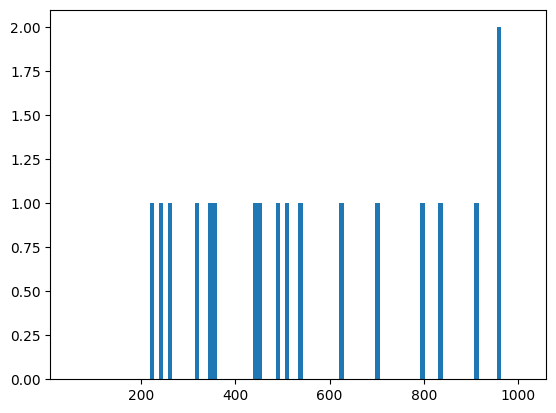

In [91]:
print(f'min max: {np.min(partial_pan)},{np.max(partial_pan)}')
h,w = full_pan.shape
print(f'zeros: {np.sum(full_pan==0)/(h*w)}')
hist, bins = np.histogram(partial_pan, bins=100)
plt.hist(hist, bins)
plt.show()

In [82]:
print(hist)
print(bins)

[1015578354          0          0          0          0   62856263
   29100232   30426323   33241428   30902663   30722113   29362947
   27364163   25164347   23111341   21515684   22360389   19472220
   18762920   18006190   17163090   16147922   15029428   13975326
   13048327   13463396   11515710   10851863   10162165    9397263
    8547368    7627810    6671896    6295705    4899581    4274127
    3781390    3429206    3180489    3004608    2892711    3093017
    2755119    2676032    2553457    2377585    2155611    1928611
    1734247    1558466    1537913    1244794    1112312     990369
     893657     816083     754163     703504     728044     629120
     599184     575736     554719     535727     516847     499028
     530534     467627     455889     442548     430960     421756
     413569     403638     396377     427501     381618     374471
     368275     362020     355183     346231     337034     364545
     325415     318543     311969     307486     301286     29